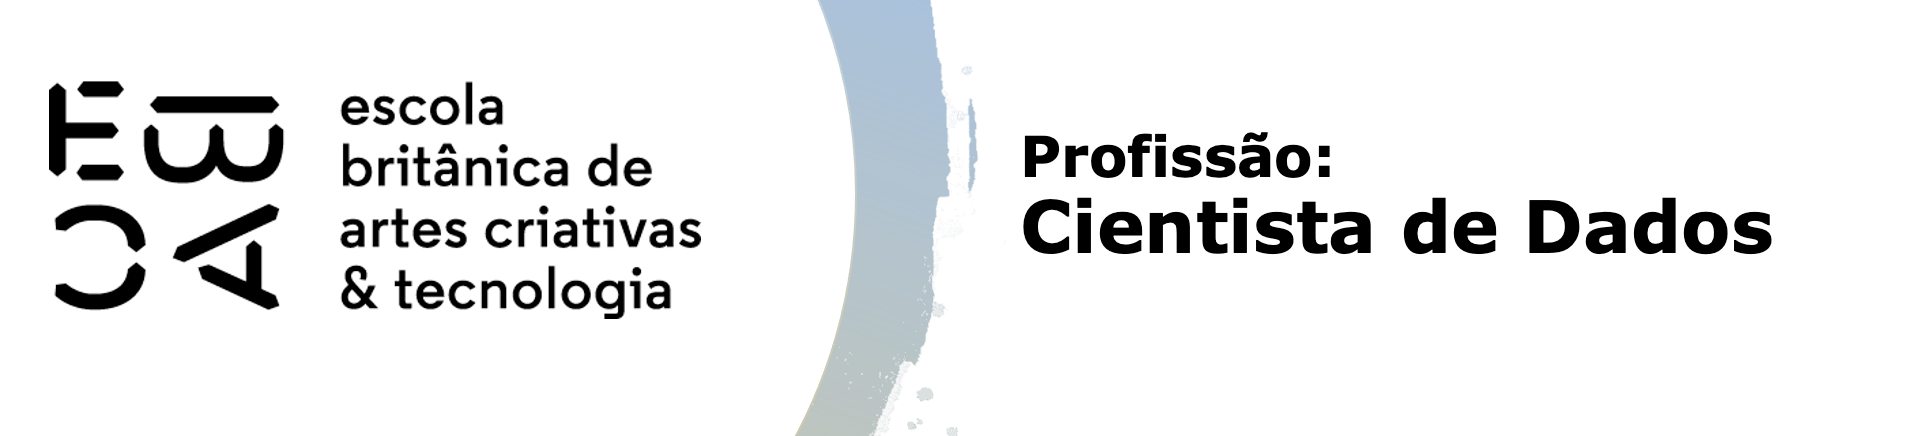

# Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
pg = sns.load_dataset('penguins')
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
pg_group = pg.groupby('sex')['body_mass_g']
pg_group.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


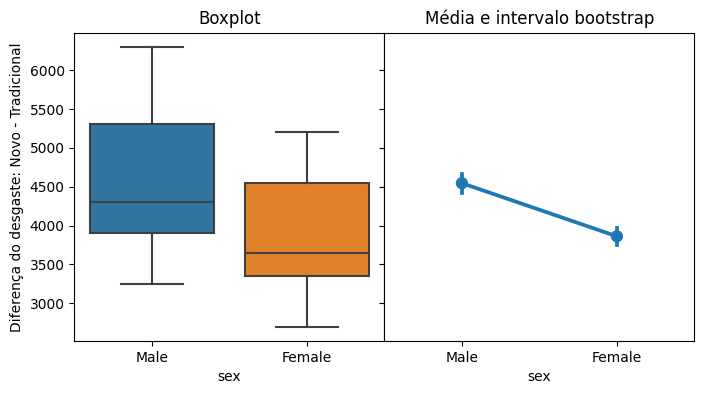

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)

sns.boxplot(data=pg, y='body_mass_g', x='sex', ax=ax[0])
ax[0].set_title('Boxplot')
# ax[0].set_ylim((-4, 0))
# ax[1].set_ylim((-4, 0))
ax[0].set_ylabel('Diferença do desgaste: Novo - Tradicional')

sns.pointplot(data=pg, y='body_mass_g', x='sex', ax=ax[1])
ax[1].set_title('Média e intervalo bootstrap')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0)

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [5]:
def estatistica_massa(pg_group) -> None:
    std = pg_group.var().mean()**0.5
    mean_male = pg_group.mean()['Male']
    mean_female = pg_group.mean()['Female']

    diferenca = mean_male - mean_female     # Numerador da formula
    erro_padrao = std*((2/len(pg)) ** .5)   # variância amostral*raiz(2/n)
    t = diferenca/erro_padrao               # Estatística do teste
    rc = st.t.ppf(.95, 18)                  # Região crítica: sob h0, t está na RC 5% das vezes
    p_value=1-st.t.cdf(t, 18)               # p-value: a menor significância para a qual rejeitamos o teste

    print(f'diferença: {diferenca:.2f}')
    print(f'desvio padrão: {std:.2f}')
    print(f'erro padrão: {erro_padrao:.2f}')
    print(f'estatística do teste: {t:.2f}')
    print(f'região crítica: {rc:.2f} ou mais')
    print(f'p-value: {p_value} ou mais')

    return t

In [6]:
t = estatistica_massa(pg_group=pg_group)

diferença: 683.41
desvio padrão: 729.43
erro padrão: 55.62
estatística do teste: 12.29
região crítica: 1.73 ou mais
p-value: 1.7220880277335482e-10 ou mais


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

A probabilidade para valores entre 1,65 e inf é de 5,82%


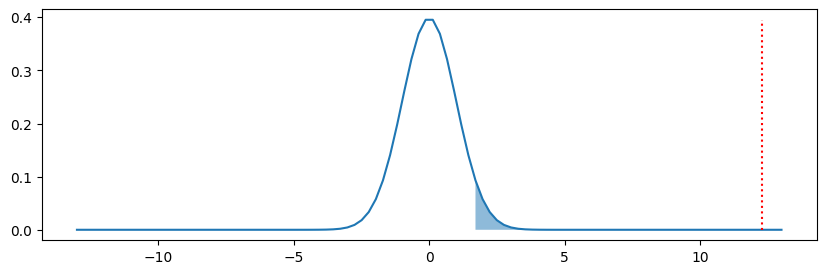

In [7]:
fig, ax = plt.subplots(figsize=(10,3))

# Parâmetros da densidade sob H0
mu = 0
variance = 1
sigma = variance**.5

# Valores de X e Y para plotar a densidade
x = np.linspace(mu - 13*sigma, mu + 13*sigma, 100)
y = st.t.pdf(x, len(pg))

# low = início da região crítica do teste
low = st.t.ppf(.95, len(pg))
high = np.inf

# Gráfico da densidade
ax.plot(x, y)
# Esta linha de referência marca o valor observado da estatística do teste
ax.vlines(x=[t], 
             ymin=0, ymax=y.max(), 
             colors='r', linestyles='dotted')

# área 
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5)

# Probabilidade de X pertencer à área
prob_area = st.t.cdf(high, 18) - st.t.cdf(low, 18)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [8]:
especies = pg['species'].unique()
especies

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

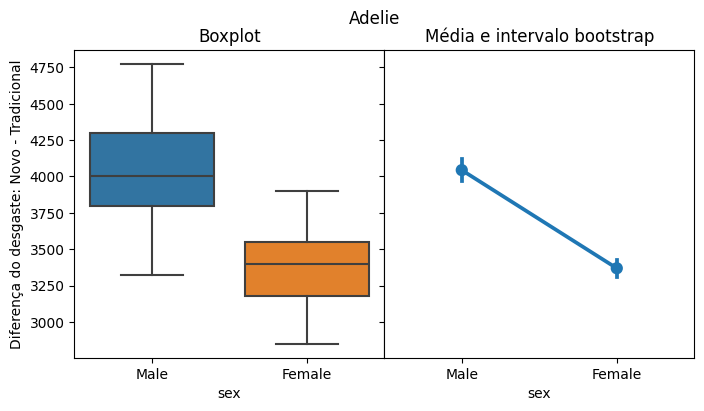

In [9]:
c = 0

fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)

plt.suptitle(t=especies[c])

sns.boxplot(data=pg[pg['species'] == especies[c]], y='body_mass_g', x='sex', ax=ax[0])
ax[0].set_title('Boxplot')
# ax[0].set_ylim((-4, 0))
# ax[1].set_ylim((-4, 0))
ax[0].set_ylabel('Diferença do desgaste: Novo - Tradicional')

sns.pointplot(data=pg[pg['species'] == especies[c]], y='body_mass_g', x='sex', ax=ax[1])
ax[1].set_title('Média e intervalo bootstrap')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0)

In [10]:
pg_group_adelie = pg[pg['species'] == especies[0]].groupby('sex')['body_mass_g']
pg_group_adelie.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,73.0,3368.835616,269.380102,2850.0,3175.0,3400.0,3550.0,3900.0
Male,73.0,4043.493151,346.811553,3325.0,3800.0,4000.0,4300.0,4775.0


In [11]:
estatistica_massa(pg_group=pg_group_adelie)

diferença: 674.66
desvio padrão: 310.52
erro padrão: 23.68
estatística do teste: 28.49
região crítica: 1.73 ou mais
p-value: 1.1102230246251565e-16 ou mais


28.494408838225425

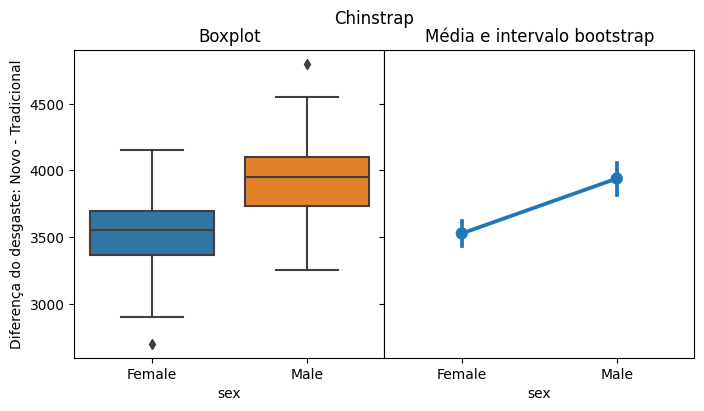

In [12]:
c += 1
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)

plt.suptitle(t=especies[c])

sns.boxplot(data=pg[pg['species'] == especies[c]], y='body_mass_g', x='sex', ax=ax[0])
ax[0].set_title('Boxplot')
# ax[0].set_ylim((-4, 0))
# ax[1].set_ylim((-4, 0))
ax[0].set_ylabel('Diferença do desgaste: Novo - Tradicional')

sns.pointplot(data=pg[pg['species'] == especies[c]], y='body_mass_g', x='sex', ax=ax[1])
ax[1].set_title('Média e intervalo bootstrap')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0)

In [13]:
pg_group_chinstrap = pg[pg['species'] == especies[1]].groupby('sex')['body_mass_g']
pg_group_chinstrap.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,34.0,3527.205882,285.333912,2700.0,3362.50,3550.0,3693.75,4150.0
Male,34.0,3938.970588,362.137550,3250.0,3731.25,3950.0,4100.00,4800.0


In [14]:
estatistica_massa(pg_group=pg_group_chinstrap)

diferença: 411.76
desvio padrão: 326.01
erro padrão: 24.86
estatística do teste: 16.56
região crítica: 1.73 ou mais
p-value: 1.2115863867734333e-12 ou mais


16.56488951120687

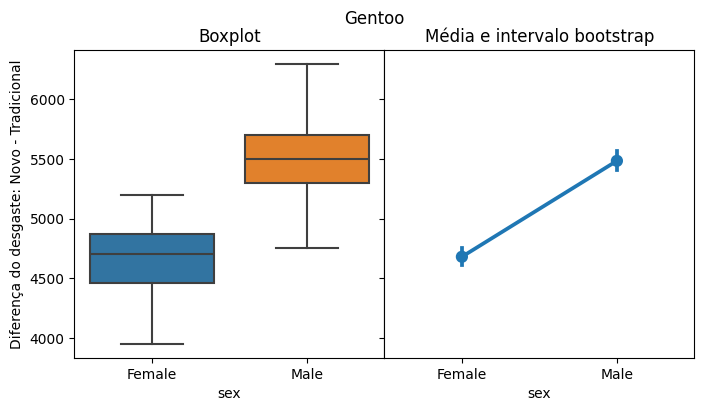

In [15]:
c += 1

fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)

plt.suptitle(t=especies[c])

sns.boxplot(data=pg[pg['species'] == especies[c]], y='body_mass_g', x='sex', ax=ax[0])
ax[0].set_title('Boxplot')
# ax[0].set_ylim((-4, 0))
# ax[1].set_ylim((-4, 0))
ax[0].set_ylabel('Diferença do desgaste: Novo - Tradicional')

sns.pointplot(data=pg[pg['species'] == especies[c]], y='body_mass_g', x='sex', ax=ax[1])
ax[1].set_title('Média e intervalo bootstrap')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace=0)

In [16]:
pg_group_gentoo = pg[pg['species'] == especies[2]].groupby('sex')['body_mass_g']
pg_group_gentoo.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,58.0,4679.741379,281.578294,3950.0,4462.5,4700.0,4875.0,5200.0
Male,61.0,5484.836066,313.158596,4750.0,5300.0,5500.0,5700.0,6300.0


In [17]:
estatistica_massa(pg_group=pg_group_gentoo)

diferença: 805.09
desvio padrão: 297.79
erro padrão: 22.71
estatística do teste: 35.46
região crítica: 1.73 ou mais
p-value: 0.0 ou mais


35.4572379757668